<a href="https://colab.research.google.com/github/Fritz-Rodrigo/Numerical_Analysis/blob/main/2020-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1

Considere el sistema de punto flotante $fl(10, 4, -15, 17)$

**a)** Usando truncamiento, halle el elemento más grande que cumple la ecuación

$$x \oplus 30 = 30$$

El número más grande es $x = 0.9999\times10^{-3}$, pues $30 + x = 0.30009999\times10^2 = 0.3\times10^2 = 30$



In [ ]:
0b11

3

**b)** Convierta el número binario $(11111000111)_2$ a un elemento normalizado del sistema.

$\begin{align}
2\cdot0 + 1 & = 1 \\
2\cdot1 + 1 & = 3 \\
2\cdot3 + 1 & = 7 \\
2\cdot7 + 1 & = 15\\
2\cdot15+ 1 & = 31\\
2\cdot31+ 0 & = 62\\
2\cdot62+ 0 & = 124\\
2\cdot124+0 & = 248\\
2\cdot248+1 & = 497\\
2\cdot497+1 & = 995\\
2\cdot995+1 & = 1991
\end{align}$

In [ ]:
0b11111000111

1991

Por lo tanto $(11111000111)_2 = (0.1991\times10^4)_{10}$

**c)** Intente predecir cuándo la suma parcial

$$s_n = \sum\limits_{k=1}^n \dfrac{1}{k}$$

deja de cambiar en el sistema de punto 
otante dado.

Si no tuviéramos la APF de 4 dígitos, entonces la suma se detendría cuando $\dfrac{1}{n}$ se vuelve despreciable en comparación con la suma parcial, i.e.
$$\dfrac{1}{n} < \epsilon_\text{mach} \sum\limits_{k=1}^{n-1} \dfrac{1}{k}$$

Pero como sí tenemos la APF de 4 dígitos con redondeo, entonces la suma parcial se detiene cuando

$\dfrac{1}{n} < \epsilon_\text{mach} = \dfrac{1}{2}\beta^{1-p}$

en este caso $\beta = 10$ y $p=4$, entonces

$\epsilon_\text{mach} = \dfrac{1}{2}10^{-3} = \dfrac{1}{2000} = 0.0005$

Si $\dfrac{1}{n} < \epsilon_\text{mach}$ entonces $n > \dfrac{1}{\epsilon_\text{mach}} = 2000$, por lo que el último término que aporta algo a la suma es $n=2000$

A continuación se implementa esta idea numéricamente

In [ ]:
p=4
x=0
y=[]
for i in range(1,2*10**(p-1)+3): # La n crítica es 2*10**(p-1)
    x = round(x + round(1/i,p-1),p-1) # n = i+1 corre de 1 a 500
    y.append(x)
x

8.448

In [ ]:
len(y)

2002

In [ ]:
y[1995:2002] #se detiene en i = 1999 = n-1, i.e. n = 2000

[8.444, 8.445, 8.446, 8.447, 8.448, 8.448, 8.448]

## 2 Cholesky Factorization

**a)** Let $v \in \mathbb{R}^3$ and
$$B =
\begin{bmatrix}
2 & 2 & 3 \\
2 & 5 & 6 \\
3 & 6 & 10
\end{bmatrix}$$

Prove that the matrix
$$A =
\begin{bmatrix}
B & v \\
v^T & 1
\end{bmatrix}
$$
is positive definite (it is __not__).

__Answer__

Let $v^T = (x,\ y,\ z)$, then
$$A =
\begin{bmatrix}
2 & 2 & 3 & x \\
2 & 5 & 6 & y \\
3 & 6 & 10 & z \\
x & y & z & 1
\end{bmatrix}
$$

Now, let $u^T = (a,\ b,\ c,\ d)$, then $u^TAu$ is a 
$(1\times4)(4\times4)(4\times1) = (1\times1)$ matrix multiplication, which gives

$$u^TAu = 
[a\quad b\quad c\quad d]
\begin{bmatrix}
2 & 2 & 3 & x \\
2 & 5 & 6 & y \\
3 & 6 & 10 & z \\
x & y & z & 1
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c \\
d
\end{bmatrix}$$

$$ = [a\quad b\quad c\quad d]
\begin{bmatrix}
2a + 2b + 3c + xd \\
2a + 5b + 6c + yd \\
3a + 6b + 10c + zd \\
xa + yb + zc + d
\end{bmatrix}$$

$$ = a(2a + 2b + 3c + xd) + b(2a + 5b + 6c + yd) + c(3a + 6b + 10c + zd) + d(xa + yb + zc + d)$$

$$ = 2a^2 + 2ab + 3ac + xad + 2ab + 5b^2 + 6bc + ybd + 3ac + 6bc + 10c^2 + zcd + xad + ybd + zcd + d^2$$

$$ = 2a^2 + 4ab + 6ac + 2xad + 5b^2 + 12bc + 2ybd + 10c^2 + 2zcd + d^2$$

$$ = (a^2 + 4ab + 4b^2) + (a^2 + 6ac + 9c^2) + (b^2 + 12bc + c^2) + d^2 + 2d(xa + yb + zc)$$

$$ = (a + 2b)^2 + (a + 3c)^2 + (b + c)^2 + d^2 + 10bc + 2d(xa + yb + zc) $$

This is postive iff
$$(a + 2b)^2 + (a + 3c)^2 + (b + c)^2 + d^2 > - 10bc - 2d(xa + yb + zc)$$

thus in general it is **not positive definite**, as we can check in
[Wolfram](https://www.wolframalpha.com/input?i=%28%282%2C+2%2C+3%2C+x%29%2C+%282%2C+5%2C+6%2C+y%29%2C+%283%2C+6%2C+10%2C+z%29%2C+%28x%2C+y%2C+z%2C+1%29%29+positive+definite).

$ $

__Counterexample__

For instance, set $u = [1,1,1,1]^T$, then $u^TAu > 0$ iff

$$ 40 + 2(x + y + z) > 0$$

$$ x + y + z > -20 $$

so, for example, if $v = (-7,-7,-7)$ then $u^TAu = -2$

$ $

Let's see if $B$ is postive definite.

Let $u = (a, b, c)$

$$u^TBu = 
[a\quad b\quad c]
\begin{bmatrix}
2 & 2 & 3 \\
2 & 5 & 6 \\
3 & 6 & 10
\end{bmatrix}
\begin{bmatrix}
a \\
b \\
c
\end{bmatrix}$$

$$ = a (2 a + 2 b + 3 c) + b (2 a + 5 b + 6 c) + c (3 a + 6 b + 10 c) $$

$$ = (2a^2 + 2ab + 3ac) + (2ab + 5b^2 + 6bc) + (3ac + 6bc + 10c^2) $$

$$ = 2a^2 + 5b^2 + 10c^2 + 4ab + 6ac + 12bc $$

$$ = (a + 2b)^2 + (a + 3c)^2 + (b + c)^2 + 10bc $$

This is always positive, but to be sure we have to find the matrix eigenvalues, which are $\lambda_1 = 15, \lambda_2 = \lambda_3 = 1$, all positive, therefore $B$ is positive definite ([Wolfram](https://www.wolframalpha.com/input?i=%28%282%2C+2%2C+3%29%2C+%282%2C+5%2C+6%29%2C+%283%2C+6%2C+10%29%29+positive+definite)).

$ $

**b)** Suponga que la matriz $C = B - vv^T$ es positiva definida. Halle la factorización de Cholesky de $A$ para cada $v \in \mathbb{R}^3$.

Sea $v = [x,\ y,\ z]^T$, entonces
$$C =
\begin{bmatrix}
2 - x^2 & 2 - xy & 3 - xz \\
2 - xy & 5 - y^2 & 6 - yz \\
3 - xz & 6 - yz & 10 - z^2 \\
\end{bmatrix}
$$

Primero veamos la factorización de Cholesky para la matriz $B$. 

https://en.wikipedia.org/wiki/Cholesky_decomposition#The_Cholesky%E2%80%93Banachiewicz_and_Cholesky%E2%80%93Crout_algorithms

Debemos sacar la raíz cuadrada en la primera entrada de la diagonal y dividir las entradas que quedan en la 1ra columna entre el resultado. Para la 2da columna, le restamos al elemento de la diagonal el elemento de la misma fila en la 1ra columna al cuadrado, y al siguiente de la 2da columna le restamos el de la misma fila multiplicado por el de la fila anterior en la 1ra columna. En la 3ra columna restamos los resultados al cuadrado de la misma fila y finalmente sacamos raíz.

$$
\begin{bmatrix}
\sqrt{2} & 0 & 0 \\
2/\sqrt{2} & 5-(2/\sqrt{2})^2 & 0 \\
3/\sqrt{2} & 6-(2/\sqrt{2})(3/\sqrt{2}) & 10-(3/\sqrt{2})^2
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{2} & 0 & 0 \\
2/\sqrt{2} & 3 & 0 \\
3/\sqrt{2} & 3 & 11/2
\end{bmatrix}
$$

$$
\begin{bmatrix}
\sqrt{2} & 0 & 0 \\
2/\sqrt{2} & \sqrt{3} & 0 \\
3/\sqrt{2} & 3/\sqrt{3} & 11/2 - (3/\sqrt{3})^2
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{2} & 0 & 0 \\
2/\sqrt{2} & \sqrt{3} & 0 \\
3/\sqrt{2} & \sqrt{3} & 5/2
\end{bmatrix}
$$

$$L =
\begin{bmatrix}
\sqrt{2} & 0 & 0 \\
2/\sqrt{2} & \sqrt{3} & 0 \\
3/\sqrt{2} & \sqrt{3} & \sqrt{5/2}
\end{bmatrix}
$$

In [ ]:
1/np.sqrt(3)

0.5773502691896258

In [ ]:
3 - 1/3

2.6666666666666665

In [ ]:
-1 - 1/3

-1.3333333333333333

In [ ]:
import numpy as np
import numpy.linalg as la

In [ ]:
np.array([
    [np.sqrt(2),0,0],
    [2/np.sqrt(2),np.sqrt(3),0],
    [3/np.sqrt(2),3/np.sqrt(3),np.sqrt(5/2)]])

array([[1.41421356, 0.        , 0.        ],
       [1.41421356, 1.73205081, 0.        ],
       [2.12132034, 1.73205081, 1.58113883]])

In [ ]:
B = np.array([
    [2,2,3],
    [2,5,6],
    [3,6,10]])

In [ ]:
la.cholesky(B)

array([[1.41421356, 0.        , 0.        ],
       [1.41421356, 1.73205081, 0.        ],
       [2.12132034, 1.73205081, 1.58113883]])

En el ejemplo 2.21 del Heath, se tiene

In [ ]:
B = np.array([
    [3,-1,-1],
    [-1,3,-1],
    [-1,-1,3]])

In [ ]:
3 - 1/3

2.6666666666666665

In [ ]:
-1 - 1/3

-1.3333333333333333

In [ ]:
np.sqrt(3 - 1/3)

1.632993161855452

In [ ]:
(-1 - 1/3)/np.sqrt(3 - 1/3)

-0.816496580927726

In [ ]:
( (-1 - 1/3)/np.sqrt(3 - 1/3) )**2

0.6666666666666666

In [ ]:
la.cholesky(B)

array([[ 1.73205081,  0.        ,  0.        ],
       [-0.57735027,  1.63299316,  0.        ],
       [-0.57735027, -0.81649658,  1.41421356]])

In [ ]:
def C(x,y,z):
    
    C = np.array([
        [2-x**2,2-x*y,3-x*z],
        [2-x*y,5-y**2,6-y*z],
        [3-x*z,6-y*z,10-z**2]])
    
    return C

In [ ]:
C(1,1,1)

array([[1, 1, 2],
       [1, 4, 5],
       [2, 5, 9]])

In [ ]:
la.cholesky(C(1,1,1))

array([[1.        , 0.        , 0.        ],
       [1.        , 1.73205081, 0.        ],
       [2.        , 1.73205081, 1.41421356]])

In [ ]:
2/np.sqrt(3)

1.1547005383792517

$$
\begin{bmatrix}
1 & 0 & 0 \\
1 & 4-1^2 & 0 \\
2 & 5-(1)(2) & 9-2^2
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
1 & 3 & 0 \\
2 & 3 & 5
\end{bmatrix}
$$

$$
\begin{bmatrix}
1 & 0 & 0 \\
1 & \sqrt{3} & 0 \\
2 & 3/\sqrt{3} & 5-(3/\sqrt{3})^2
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 & 0 \\
1 & \sqrt{3} & 0 \\
2 & \sqrt{3} & 2
\end{bmatrix}
$$

$$L =
\begin{bmatrix}
1 & 0 & 0 \\
1 & \sqrt{3} & 0 \\
2 & \sqrt{3} & \sqrt{2}
\end{bmatrix}
$$

In [ ]:
C(1,2,3)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
C(3,2,1)

array([[-7, -4,  0],
       [-4,  1,  4],
       [ 0,  4,  9]])

In [ ]:
#la.cholesky(C(3,2,1))
#No es positiva definida

In [ ]:
def A(x,y,z):
    
    A = np.array([
        [2,2,3,x],
        [2,5,6,y],
        [3,6,10,z],
        [x,y,z,1]])
    
    return A

In [ ]:
A(1,1,1)

array([[ 2,  2,  3,  1],
       [ 2,  5,  6,  1],
       [ 3,  6, 10,  1],
       [ 1,  1,  1,  1]])

$$ L_{jj} = \pm\sqrt{ A_{jj} - \sum_{k=1}^{j-1} L_{jk}^2 } $$

$$ L_{ij} = \frac{1}{L_{jj}} \left( A_{ij} - \sum_{k=1}^{j-1} L_{ik} L_{jk} \right) \quad \text{for } i>j $$

$$
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0\\
\sqrt{2} & 5-\sqrt{2}^2 & 0 & 0 \\
3/\sqrt{2} & 6-3 & 10-9/2 & 0 \\
1/\sqrt{2} & 1-(\sqrt{2})(1/\sqrt{2}) & 1 & 1
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0\\
\sqrt{2} & \sqrt{3} & 0 & 0 \\
3/\sqrt{2} & \sqrt{3} & 11/2-3 & 0 \\
1/\sqrt{2} & 0/\sqrt{3} & 1 & 1
\end{bmatrix}
$$

$$
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0\\
\sqrt{2} & \sqrt{3} & 0 & 0 \\
3/\sqrt{2} & \sqrt{3} & \sqrt{5/2} & 0 \\
1/\sqrt{2} & 0/\sqrt{3} & 1-3/2 - 0 & 1
\end{bmatrix}
=
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0\\
\sqrt{2} & \sqrt{3} & 0 & 0 \\
3/\sqrt{2} & \sqrt{3} & \sqrt{5/2} & 0 \\
1/\sqrt{2} & 0/\sqrt{3} & -1/\sqrt{10} & 1-1/10-0-1/2
\end{bmatrix}
$$

$$L =
\begin{bmatrix}
\sqrt{2} & 0 & 0 & 0\\
\sqrt{2} & \sqrt{3} & 0 & 0 \\
3/\sqrt{2} & \sqrt{3} & \sqrt{5/2} & 0 \\
1/\sqrt{2} & 0/\sqrt{3} & -1/\sqrt{10} & \sqrt{2/5}
\end{bmatrix}
$$

In [ ]:
3/np.sqrt(2)

2.1213203435596424

In [ ]:
np.sqrt(5/2)

1.5811388300841898

In [ ]:
np.sqrt(2/5)

0.6324555320336759

In [ ]:
-1/np.sqrt(10)

-0.31622776601683794

In [ ]:
la.cholesky(A(1,1,1))

array([[ 1.41421356e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 1.41421356e+00,  1.73205081e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.12132034e+00,  1.73205081e+00,  1.58113883e+00,
         0.00000000e+00],
       [ 7.07106781e-01,  1.28197512e-16, -3.16227766e-01,
         6.32455532e-01]])

In [ ]:
A(-1,1,1)

array([[ 2,  2,  3, -1],
       [ 2,  5,  6,  1],
       [ 3,  6, 10,  1],
       [-1,  1,  1,  1]])

In [ ]:
#la.cholesky(A(-1,1,1))
#No es definida positiva

# 3

Halle la parábola $$y = a_0 + a_1t + a_2t^2$$

que ajusta por mínimos cuadrados a los datos de la tabla
$$
\begin{array}{c|c}
t_i & y_i \\ \hline
0 & 100 \\
1 & 118 \\
2 & 92 \\
3 & 48 \\
3.5 & 7 \\
\end{array}
$$

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
y = np.array([100, 118, 92, 48, 7])

In [ ]:
t = np.array(range(4))
t = np.append(t,3.5)
t

array([0. , 1. , 2. , 3. , 3.5])

In [ ]:
A = np.zeros([5,3])
for i in range(5):
    for j in range(3):
        A[i,j] = t[i]**j
A

array([[ 1.  ,  0.  ,  0.  ],
       [ 1.  ,  1.  ,  1.  ],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.5 , 12.25]])

In [ ]:
ATA = np.transpose(A).dot(A)
ATA

array([[  5.    ,   9.5   ,  26.25  ],
       [  9.5   ,  26.25  ,  78.875 ],
       [ 26.25  ,  78.875 , 248.0625]])

In [ ]:
b = np.transpose(A).dot(y)
b

array([ 365.  ,  470.5 , 1003.75])

In [ ]:
a = la.solve(ATA,b)
a

array([101.00237906,  29.76605868, -16.10626487])

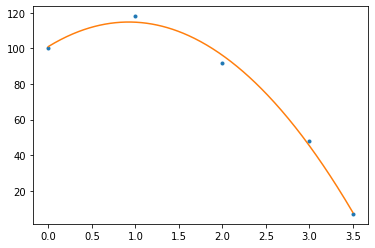

In [ ]:
x = np.linspace(0,3.5,351)
plt.plot(t,y,'.')
plt.plot(x, a[0] + a[1]*x + a[2]*x**2)
plt.show()

## 4 Regla de cuadratura.

**a)** Calcule una regla de cuadratura gaussiana de 3 puntos en el intervalo $[-2, 2]$.

**b)** Use la regla de cuadratura obtenida para aproximar

$$\int_{-2}^2 x \cos(x)\ dx = \big[x\sin(x) + \cos(x)\big]_{-2}^2 = 0$$

La regla de cuadratura es

$$I(f) = \int_{-2}^2 x \cos(x)\ dx \approx w_1 f(x_1) + w_2 f(x_2) + w_3 f(x_3) = G_3(f)$$

con

$$w_1 + w_2 + w_3 = \int_{-2}^2 dx = 4$$

$$w_1x_1 + w_2x_2 + w_3x_3 = \int_{-2}^2 x\ dx = 0$$

$$w_1x_1^2 + w_2x_2^2 + w_3x_3^2 = \int_{-2}^2 x^2\ dx = \frac{16}{3}$$

$$w_1x_1^3 + w_2x_2^3 + w_3x_3^3 = \int_{-2}^2 x^3\ dx = 0$$

$$w_1x_1^4 + w_2x_2^4 + w_3x_3^4 = \int_{-2}^2 x^4\ dx = \frac{64}{5}$$

$$w_1x_1^5 + w_2x_2^5 + w_3x_3^5 = \int_{-2}^2 x^5\ dx = 0$$

Dado el intervalo, tomamos $\boxed{x_1 = -x_3}$ y $\boxed{x_2 = 0}$

De la 2da ecuación:
$$x_1(w_1 - w_3) = 0$$

por lo tanto $\boxed{w_1 = w_3}$. De la 3ra ecuación:
$$x_1^2(w_1 + w_3) = 2w_1x_1^2 = \frac{16}{3}$$

De la 5ta ecuación:
$$2w_1x_1^4 = \frac{64}{5} = \frac{16}{3}x_1^2$$

por lo tanto $$x_1 = \pm\sqrt{\frac{12}{5}}$$

Tomamos $$\boxed{x_1 = - \sqrt{\frac{12}{5}},\quad x_2 = 0,\quad x_3 = \sqrt{\frac{12}{5}}}$$

Sustituyendo en lo que se obtuvo de la 3ra ecuación:
$$\boxed{w_1 = \frac{10}{9} = w_3}$$

Y de la 1ra ecuación: $$\boxed{w_2 = 4 - \frac{20}{9} = \frac{16}{9}}$$

por lo tanto

$$w_1 f(x_1) + w_2 f(x_2) + w_3 f(x_3) = \frac{10}{9}(-\sqrt{12/5})\cos(-\sqrt{12/5}) + \frac{16}{9}(0) + \frac{10}{9}(\sqrt{12/5})\cos(\sqrt{12/5}) = 0$$

In [ ]:
import numpy as np

Para verificar, calculemos la cuadratura con un cambio de variable de $x$ en el intervalo $[\alpha,\beta] = [-2,2]$ a $t$ en el intervalo $[a,b] = [0,2]$ en $x=0,1,2$ con la siguiente transformación lineal
$$t = \frac{(b-a)x + a\beta - b\alpha}{\beta-\alpha} = \frac{2x + 4}{4} = \frac{x}{2} + 1$$

Y la integral está dada por
$$I(g) = \frac{b-a}{\beta-\alpha} \int_\alpha^\beta g(t)\ dx
\approx \frac{b-a}{\beta-\alpha} \sum_{i=1}^n w_i g\left(\frac{(b-a)x_i + a\beta - b\alpha}{\beta-\alpha}\right)$$

entonces $$I(g) \approx \frac{1}{2} \Big[w_1 g(t_1) + w_2 g(t_2) + w_3 g(t_3)\Big]$$

$$ = \frac{1}{2} \Big[\frac{10}{9} g(-\sqrt{3/5}+1) + \frac{16}{9} g(1) + \frac{10}{9} g(\sqrt{3/5}+1)\Big]$$

$$ = \frac{1}{2} \Big[\frac{10}{9} (-\sqrt{3/5}+1)\cos(-\sqrt{3/5}+1) + \frac{16}{9} \cos(1) + \frac{10}{9} (\sqrt{3/5}+1)\cos(\sqrt{3/5}+1)\Big]$$

In [ ]:
((10/9)*(1-np.sqrt(3/5))*np.cos(1-np.sqrt(3/5)) + (16/9)*np.cos(1) + (10/9)*(1+np.sqrt(3/5))*np.cos(1+np.sqrt(3/5)))/2

0.4027890075332904

In [ ]:
2*np.sin(2) + np.cos(2) - 1

0.40244801710422107

# 5

Calcule un spline cuadrático $s(P,2)$ continuamente diferenciable en la partición $P := \{-2, 0, 1, 6\}$ del intervalo $[-2, 6]$ tal que

$$s(-2) = s'(-2) = 0$$
$$s(6) = s'(6) = 0$$

### Spline Cuadrático

Para 4 puntos tenemos 3 intervalos: $[t_1,t_2]$, $[t_2,t_3]$, $[t_3,t_4]$, así que el interpolante requerido es una función cúbica a trozos definida por 3 polinomios cuadráticos:

$$p(t) = a_0 + a_1 t + a_2 t^2$$

$$q(t) = b_0 + b_1 t + b_2 t^2$$

$$r(t) = c_0 + c_1 t + c_2 t^2$$

De modo que el sistema de ecuaciones a resolver es el siguiente

$$Ax = 
\begin{pmatrix}
    1 & t_1 & t_1^2 & 0 & 0 & 0 & 0 & 0 & 0\\
    1 & t_2 & t_2^2 & -1 & -t_2 & -t_2^2 & 0 & 0 & 0\\
    0 & 0 & 0 & 1 & t_3 & t_3^2 & -1 & -t_3 & -t_3^2\\
    0 & 0 & 0 & 0 & 0 & 0 & 1 & t_4 & t_4^2\\
    0 & 1 & 2t_2 & 0 & -1 & -2t_2 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 1 & 2t_3 & 0 & -1 & -2t_3\\
    0 & 1 & 2t_1 & 0 & 0 & 0 & 0 & 0 & 0\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 2t_4\\
    0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
    a_0 \\
    a_1 \\
    a_2 \\
    b_0 \\
    b_1 \\
    b_2 \\
    c_0 \\
    c_1 \\
    c_2 \\
\end{pmatrix}
=
\begin{pmatrix}
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    0 \\
    1 \\
\end{pmatrix}
= y$$

donde sabemos de antemano que todo queda en términos de $c_2$, así que lo escogemos igual a $1$.

$$c_0 = 36c_2, \qquad c_1 = -12c_2$$

$$a_2 = 5c_2, \qquad b_2 = -15c_2$$

$$a_0 = b_0 = a_1 = b_1 = 20c_2 = 4a_2$$

In [ ]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [ ]:
def pol(t,c):
    p = 0
    for i in range(len(c)): #Solo funciona con len(c) y no con len(t), no sé por qué
        p = p + c[i]*(t)**i
    return p

In [ ]:
def cuad_spline(t):
    
    A = np.zeros([9,9])

    for i in range(1):

        for j in range(3):
            A[0,j] = t[i]**j
            A[1,j] = t[i+1]**j
            A[1,j+3] = -t[i+1]**j
            A[2,j+3] = t[i+2]**j
            A[2,j+6] = -t[i+2]**j
            A[3,j+6] = t[i+3]**j
        for j in range(2):
            A[4,j+1] = (j+1)*t[i+1]**(j)
            A[4,j+4] = -(j+1)*t[i+1]**(j)
            A[5,j+4] = (j+1)*t[i+2]**(j)
            A[5,j+7] = -(j+1)*t[i+2]**(j)
        A[6,1] = 1
        A[6,2] = 2*t[i]
        A[7,7] = 1
        A[7,8] = 2*t[i+3]
        A[8,8] = 1
        print(A)

        y = np.zeros(9)
        y[8] = 1

        k = la.solve(A,y)
        a = k[0:3]
        b = k[3:6]
        c = k[6:9]
        x1 = np.linspace(t[i],t[i+1],51)
        x2 = np.linspace(t[i+1],t[i+2],51)
        x3 = np.linspace(t[i+2],t[i+3],51)
        plt.plot(x1, pol(x1,a))
        plt.plot(x2, pol(x2,b))
        plt.plot(x3, pol(x3,c))
        plt.title('Splines cuadráticos')
        
    s = [pol(t[0],a), pol(t[1],b), pol(t[2],b), pol(t[3],c)]
    plt.plot(t, s, 'ko')
    
    return a,b,c

[[ 1. -2.  4.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.  0.  1.  6. 36.]
 [ 0.  1.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  2.  0. -1. -2.]
 [ 0.  1. -4.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. 12.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.]]


(array([20., 20.,  5.]), array([ 20.,  20., -15.]), array([ 36., -12.,   1.]))

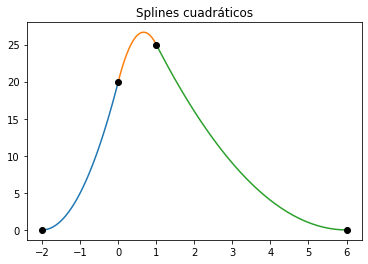

In [ ]:
cuad_spline([-2,0,1,6])

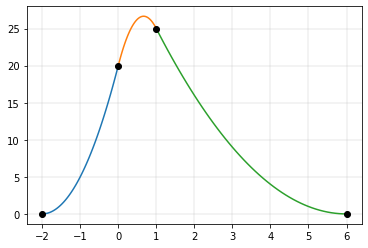

In [ ]:
x1 = np.linspace(-2,0,51)
x2 = np.linspace(0,1,51)
x3 = np.linspace(1,6,51)
c2 = 1
a = [20*c2,20*c2,5*c2]
b = [20*c2,20*c2,-15*c2]
c = [36*c2,-12*c2,1*c2]
plt.plot(x1, pol(x1,a))
plt.plot(x2, pol(x2,b))
plt.plot(x3, pol(x3,c))
y1 = pol(-2,a)
y2 = pol(0,b)
y3 = pol(1,b)
y4 = pol(6,c)
plt.plot([-2,0,1,6], [y1,y2,y3,y4], 'ko')
plt.grid(lw=0.3)

# 6

Sea $g \in C[a,b]$ tal que $g(x) \in [a,b]$ para todo $x \in [a,b]$

**a)** Pruebe que $g$ tiene al menos un punto fijo en $[a,b]$

Como $g(x) \in [a,b]$ entonces $g(a) \geq a$ y $g(b) \leq b$. Sea $f(x) = g(x) - x$, entonces $f(a) \geq 0$ y $f(b) \leq 0$, y como $g$ es continua entonces $f$ es continua y existe por lo menos un $\xi \in [a,b]$ tal que $f(\xi) = 0$, i.e. $g(\xi) = \xi$ para algún $\xi \in [a,b]$, i.e. $\xi$ es punto fijo.

**b)** Suponga además que $g$ es diferenciable sobre $(a,b)$ y que existe una constante positiva $k < 1$ tal que

$$|g'(x)| \leq k \quad \forall\ x \in (a,b)$$

Pruebe que $g$ tiene un único punto fijo sobre $[a,b]$

Por el TVM, existe $c \in (x,y) \subset (a,b)$ tal que

$$\frac{|g(x)-g(y)|}{|x-y|} = |g'(c)| \leq k < 1$$

por lo tanto $$|g(x)-g(y)| < |x-y|$$

Si $x$ y $y$ ambos fueran puntos fijos entonces $$|g(x)-g(y)| = |x-y|\ ! $$

por lo tanto $g$ tiene un único punto fijo en $[a,b]$